## Data Engineering Project - Python & Postgres

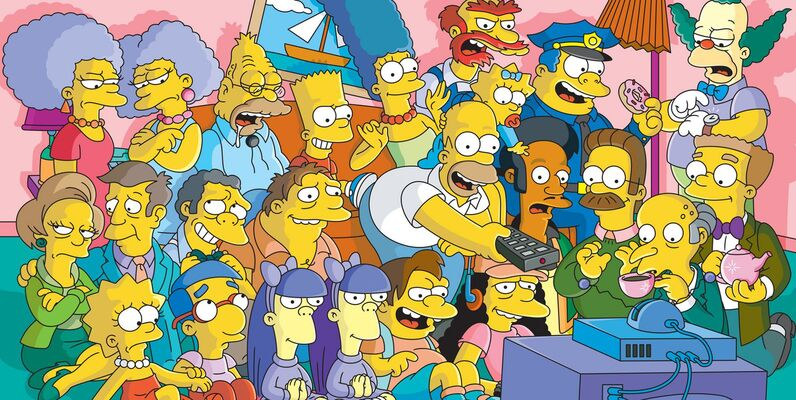

In [1]:
# Libraries
import psycopg2
import pandas as pd

In [44]:
def create_database():
    # Connect to default database
    # conn = psycopg2.connect("host=127.0.0.1 dbname=student user=student password=student")
    
    conn = psycopg2.connect("host=127.0.0.1 dbname=postgres user=postgres password=root")
    
    conn.set_session(autocommit=True)
    
    cur = conn.cursor()
    
    # create sparkfy database with UTF encoding
    cur.execute("DROP DATABASE IF EXISTS simpsons")
    cur.execute("CREATE DATABASE simpsons")
    
    # close connection to default database
    conn.close()
    
    # connect to sparkfy database
    conn = psycopg2.connect("host=127.0.0.1 dbname=simpsons user=postgres password=root")
    cur = conn.cursor()
    
    return cur, conn

In [ ]:
dbname=postgres user=postgres password=root

In [34]:
def drop_tables(cur, conn):
    for query in drop_tables_queries:
        cur.execute(query)
        conn.commit()

In [35]:
def create_tables(cur, conn):
    for query in create_table_queries:
        cur.execute(query)
        conn.commit()

## Get Data from CSV Archives

#### Let's reduce the data amount using only the necessary columns

In [5]:
characters = pd.read_csv('simpsons_characters.csv')

In [6]:
# We have many instances with NAN so let's not include this data as it is irrelevant for now.
characters.head(10)

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN
5,24,Little Boy,little boy,NaN
6,26,Lewis Clark,lewis clark,NaN
7,27,Little Girl,little girl,NaN
8,29,Bubbles,bubbles,NaN
9,30,Moldy,moldy,NaN


In [15]:
characters['gender'].value_counts()

m    252
f     71
Name: gender, dtype: int64

In [8]:
characters = characters[['id', 'name', 'normalized_name']]

In [10]:
characters.head(5)

,id,name,normalized_name
0,7,Children,children
1,12,Mechanical Santa,mechanical santa
2,13,Tattoo Man,tattoo man
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky
4,20,Students,students


In [11]:
characters['name'].value_counts()

Children           1
Titi               1
Cyrus              1
Battery            1
Energizer Bunny    1
                  ..
Immigrants         1
Hasidic Man        1
Cheerleaders       1
Cadet Anderson     1
Agent Johnson      1
Name: name, Length: 6722, dtype: int64

In [12]:
# let's use the normalized data only. No need for the column name
characters['normalized_name'].value_counts()

children           1
titi               1
cyrus              1
battery            1
energizer bunny    1
                  ..
immigrants         1
hasidic man        1
cheerleaders       1
cadet anderson     1
agent johnson      1
Name: normalized_name, Length: 6722, dtype: int64

In [13]:
characters = characters[['id', 'normalized_name']]

In [14]:
characters.head(5)

,id,normalized_name
0,7,children
1,12,mechanical santa
2,13,tattoo man
3,16,doctor zitsofsky
4,20,students


#### Let's reduce the data amount using only the necessary columns for the epsodes

In [15]:
epsodes = pd.read_csv('simpsons_episodes.csv')

In [16]:
# Seems that all columns are important for the project
epsodes.head(10)

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating
0,10,Homer's Night Out,3/25/90,7G10,1,10,10,30.3,50816.0,7.4
1,12,Krusty Gets Busted,4/29/90,7G12,1,12,12,30.4,62561.0,8.3
2,14,"Bart Gets an ""F""",10/11/90,7F03,2,1,14,33.6,59575.0,8.2
3,17,Two Cars in Every Garage and Three Eyes on Eve...,11/1/90,7F01,2,4,17,26.1,64959.0,8.1
4,19,Dead Putting Society,11/15/90,7F08,2,6,19,25.4,50691.0,8.0
5,21,Bart the Daredevil,12/6/90,7F06,2,8,21,26.2,57605.0,8.4
6,23,Bart Gets Hit by a Car,1/10/91,7F10,2,10,23,24.8,56486.0,7.8
7,26,Homer vs. Lisa and the 8th Commandment,2/7/91,7F13,2,13,26,26.2,58277.0,8.0
8,28,"Oh Brother, Where Art Thou?",2/21/91,7F16,2,15,28,26.8,47426.0,8.2
9,30,Old Money,3/28/91,7F17,2,17,30,21.2,44331.0,7.6


#### Let's reduce the data amount using only the necessary columns for the views

In [17]:
views = pd.read_csv('ViewsByTitle.csv')

In [18]:
# The viwes table is pretty much the same info shown at the previous tables. Let's not include this one. 
views.head(10)

,titles,views_title,imdb_rating
0,Homer's Night Out,50816.0,7.4
1,Krusty Gets Busted,62561.0,8.3
2,"Bart Gets an ""F""",59575.0,8.2
3,Two Cars in Every Garage and Three Eyes on Eve...,64959.0,8.1
4,Dead Putting Society,50691.0,8.0
5,Bart the Daredevil,57605.0,8.4
6,Bart Gets Hit by a Car,56486.0,7.8
7,Homer vs. Lisa and the 8th Commandment,58277.0,8.0
8,"Oh Brother, Where Art Thou?",47426.0,8.2
9,Old Money,44331.0,7.6


### Let's Create the Data Base 

In [45]:
# Initializing data base simpsons
cur, conn = create_database()

In [46]:
# Creating table characters
character_table = ("""CREATE TABLE IF NOT EXISTS character_table(id INT PRIMARY KEY,
normalized_name VARCHAR)""")

In [47]:
# Creating Table Episodes
episode_table = ("""CREATE TABLE IF NOT EXISTS epsode_table(id INT,
title VARCHAR, original_air_date DATE, production_code VARCHAR, 
season INT, number_in_season INT, number_in_series INT, us_viewers_in_millions FLOAT, views FLOAT, imdb_rating FLOAT)""")

In [50]:
# Lets execute the queries into the database - First add character_table
cur.execute(character_table)
conn.commit()

In [51]:
# Lets execute the queries into the database - Second add episode_table
cur.execute(episode_table)
conn.commit()

In [52]:
# Let's insert the data into the tables
char_insert = ("""INSERT INTO character_table(id, normalized_name) VALUES (%s, %s)""")

In [53]:
for i, row in characters.iterrows():
    cur.execute(char_insert, list(row))

In [54]:
conn.commit()

In [78]:
epis_insert = ("""INSERT INTO epsode_table(id ,
title , original_air_date , production_code , 
season , number_in_season , number_in_series , us_viewers_in_millions , views , imdb_rating ) VALUES (%s, %s, %s, %s, %s,
%s, %s, %s, %s, %s)""")

In [79]:
cur.execute("ROLLBACK")

In [80]:
for j, row in epsodes.iterrows():
    cur.execute(epis_insert, list(row))

## Let's see the results

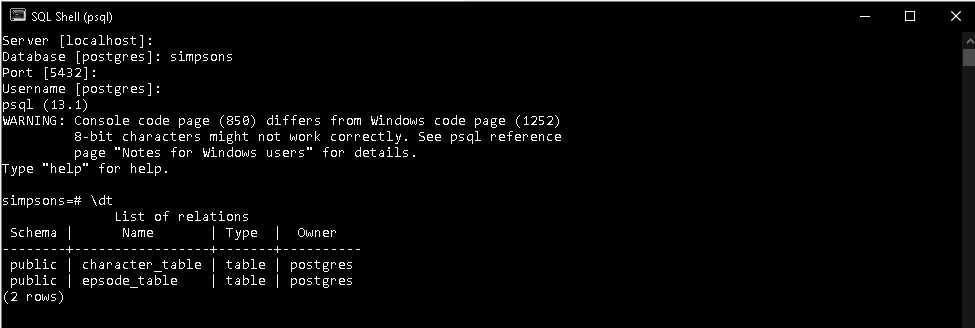

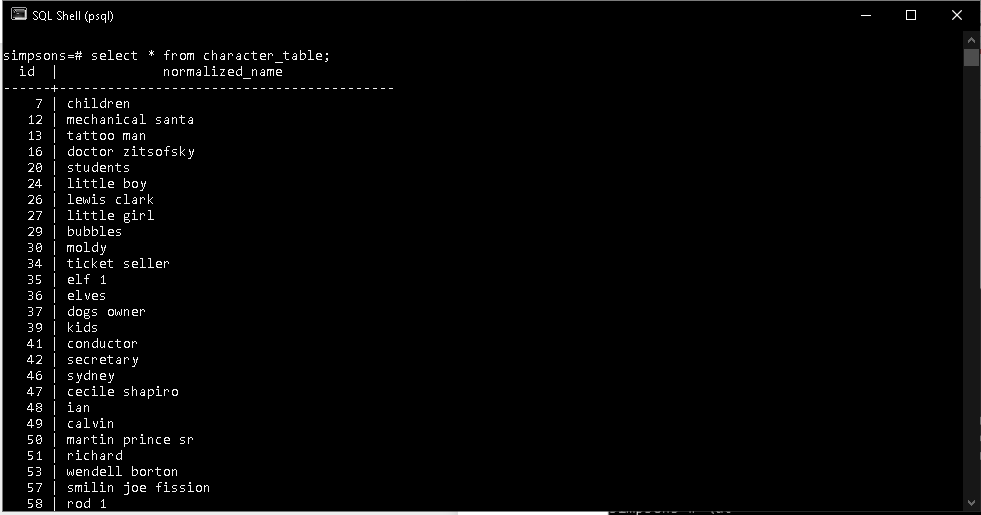

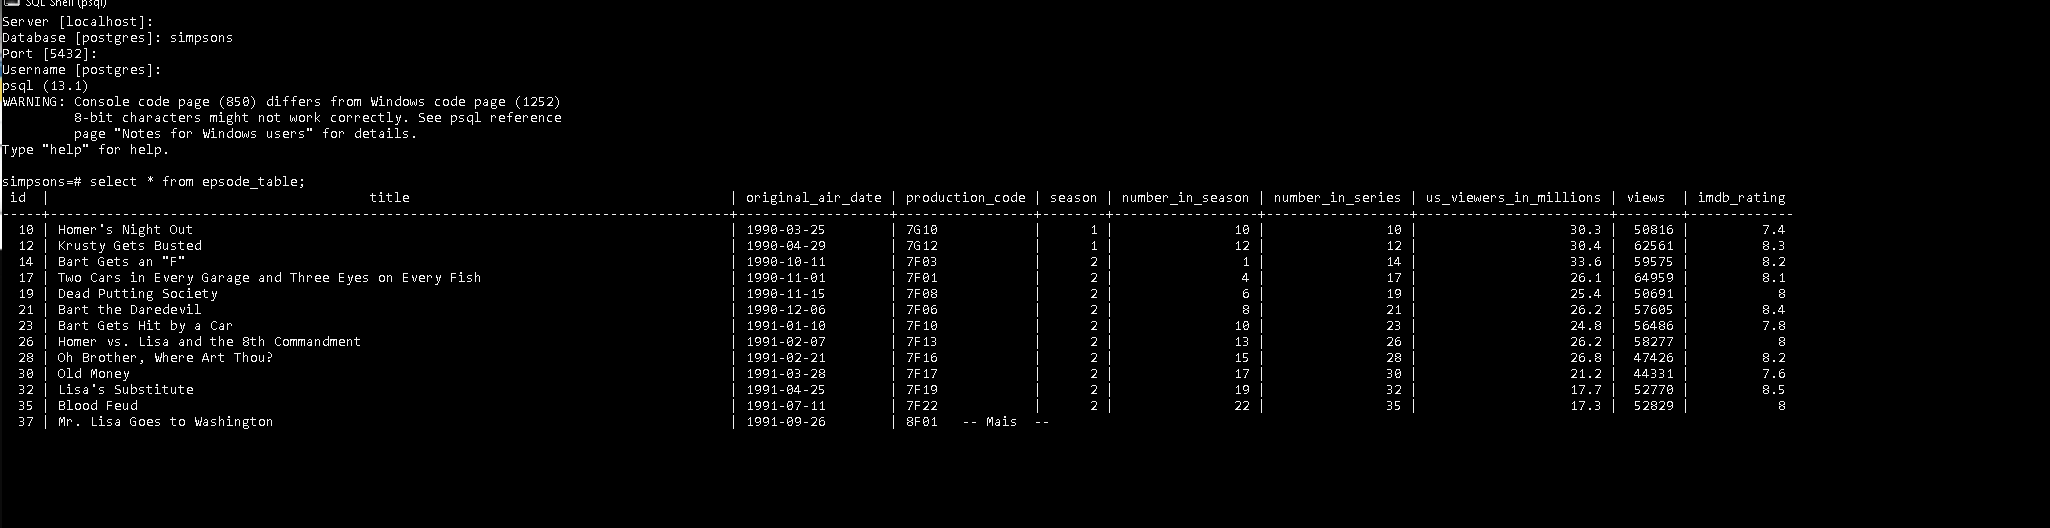

#### We can see that the data was uploaded properlly into the database.

### END